In [4]:
import pandas as pd 

df = pd.read_csv('../redfin_metro_market_tracker.tsv000', sep='\t')

sddf = df.loc[df.parent_metro_region.str.contains('San Diego', case=False)]

/tmp/ipykernel_28022/4074239811.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sddf['date'] = pd.to_datetime(sddf['period_end'])


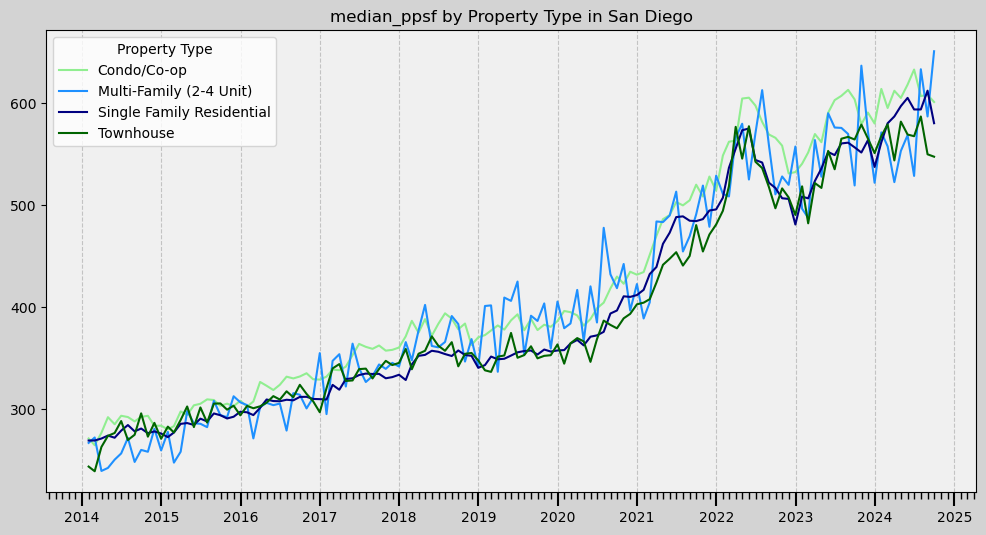

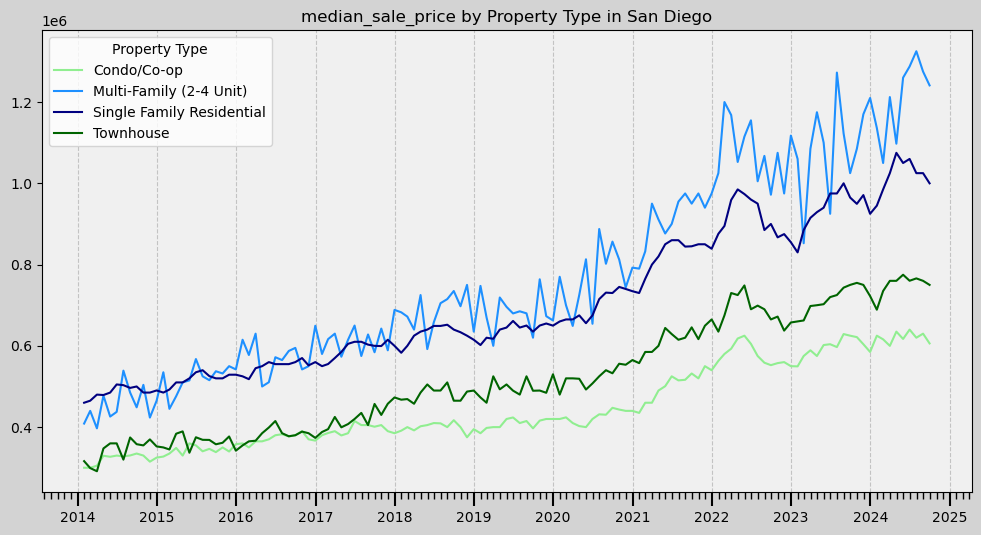

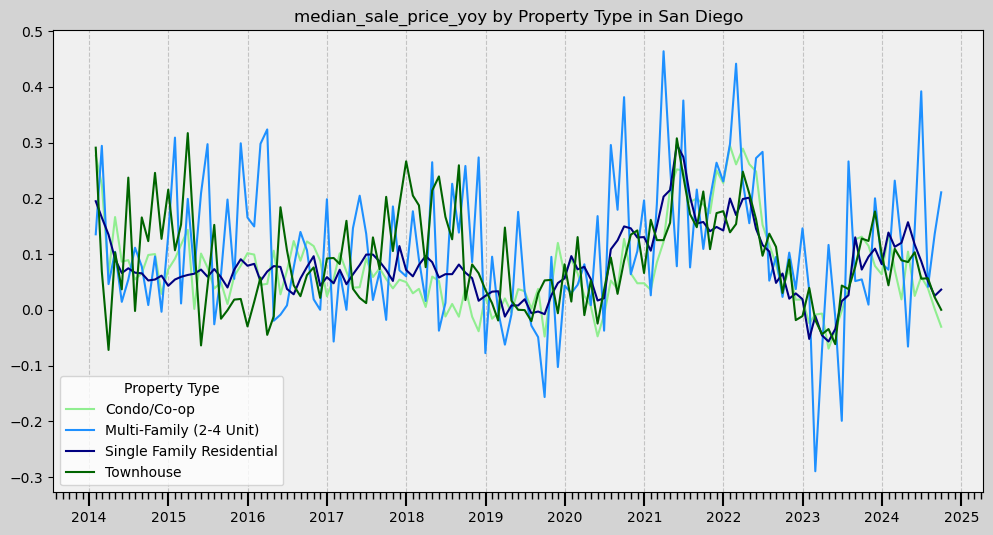

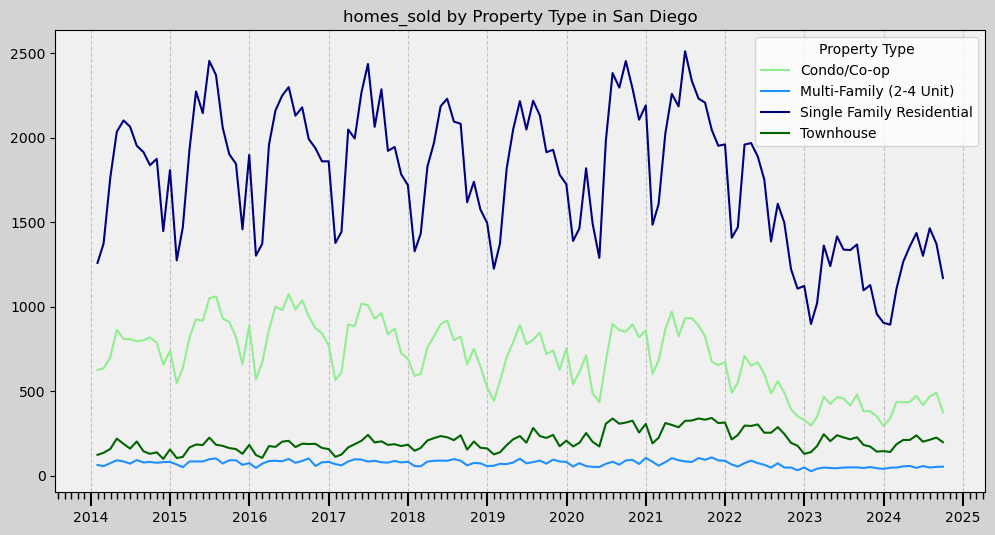

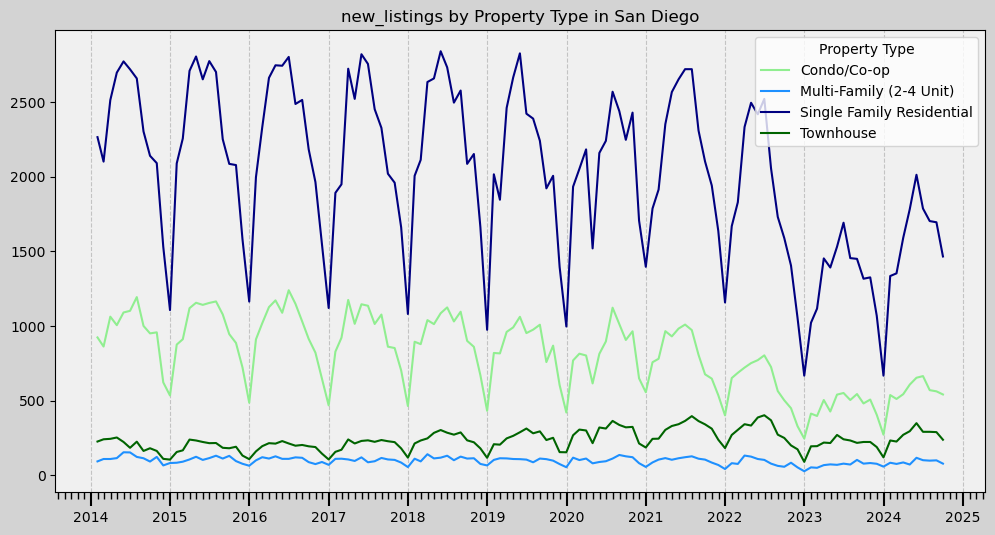

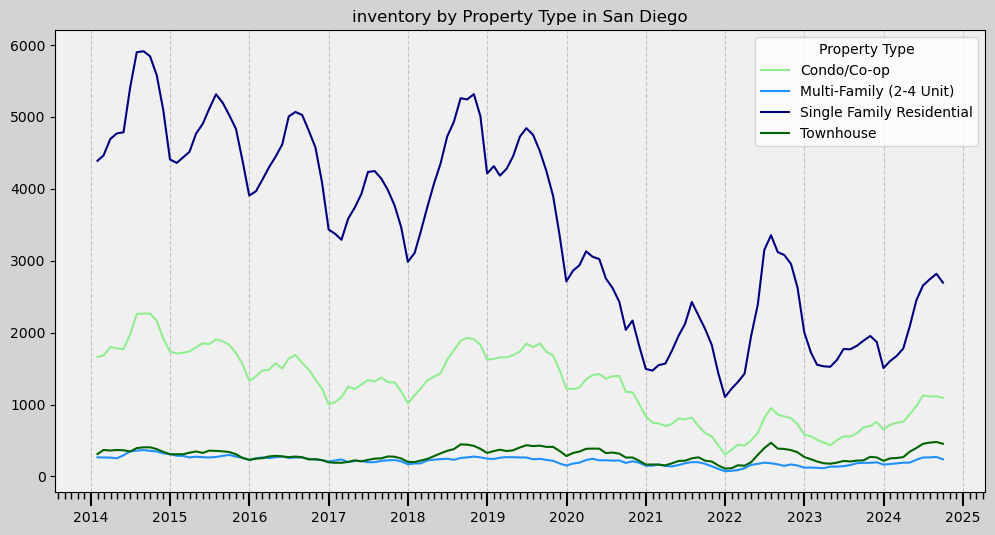

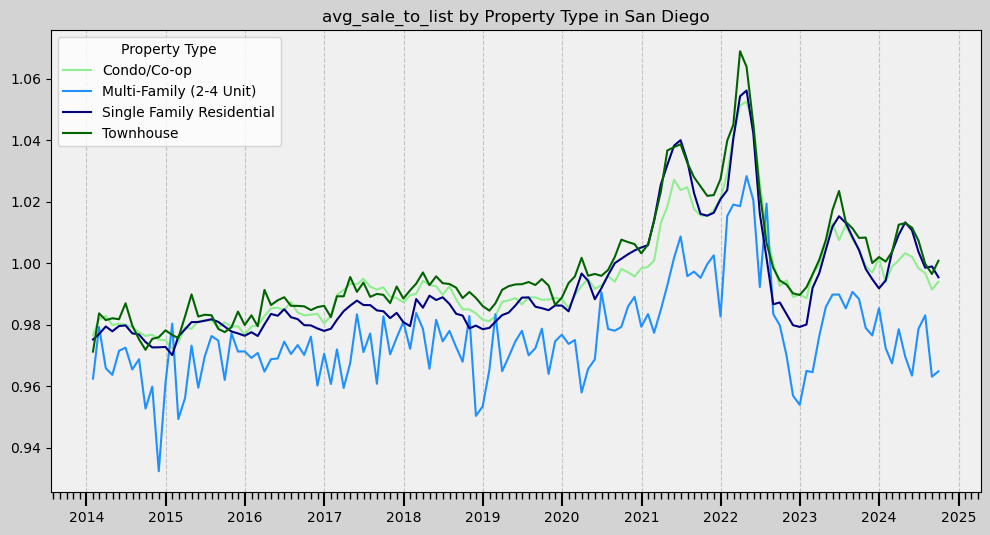

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

sddf['date'] = pd.to_datetime(sddf['period_end'])
sddf = sddf.loc[sddf.date > datetime(2014, 1, 1)]
graph_fields = [
    'median_ppsf', 
    'median_sale_price', 
    'median_sale_price_yoy', 
    'homes_sold', 
    'new_listings', 
    'inventory', 
    'avg_sale_to_list'
]
color_map = {
    'Condo/Co-op': '#90EE90',
    'Multi-Family (2-4 Unit)': '#1E90FF',
    'Single Family Residential': '#000080',
    'Townhouse': '#006400'

}

for field in graph_fields:
    pivot_df = sddf.pivot(index='date', columns='property_type', values=field)
    pivot_df = pivot_df.drop(columns = ['All Residential'])
    plt.figure(figsize = (12,6))
    for cat in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[cat], label=cat, color = color_map[cat])
    plt.legend(title='Property Type')

    plt.title(f'{field} by Property Type in San Diego')

    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

    plt.tick_params(axis='x', which='major', length=10, width=1.5)  
    plt.tick_params(axis='x', which='minor', length=5, width=1) 

    plt.grid(True, which='major', axis='x', linestyle='--', alpha=0.7)

    plt.gca().set_facecolor('#f0f0f0') 
    plt.gcf().set_facecolor('#d3d3d3')  
    plt.show()